<a href="https://colab.research.google.com/github/NatnaelTDaba/CAP5610/blob/main/CAP5610_hw1_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir('/content/drive/MyDrive/CAP5610/')

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

# Q1-Q4

The code snippet in this section was used to answer questions 1-4 from the assignment.

In [ ]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Q5

The code snippet in this section was used to answer question 5 from the assignment.

In [ ]:
train_df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
test_df.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

# Q6

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Q7

In [ ]:
train_df_copy = train_df.copy(deep=True)
train_df_copy.drop(['Survived', 'PassengerId','Pclass'], axis=1).describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


# Q8

In [ ]:
train_df_q8 = train_df[['Pclass','Sex','Embarked']]

## Count

Computing **count** i.e. the total number of catergorical values per column.

In [ ]:
train_df_q8.count()

Pclass      891
Sex         891
Embarked    889
dtype: int64

## Unique

Computing **unique** i.e. the total number of unique categorical values per column.

In [ ]:
train_df_q8.nunique()

Pclass      3
Sex         2
Embarked    3
dtype: int64

## Top and freq

Computing **freq** and **top** i.e. total number of the most frequent categorical
value and the most frequent categorical value for each categorical feature.

In [ ]:
for feature in list(train_df_q8.columns):
  val_count = train_df_q8[feature].value_counts()
  print("Categorical feature name:", feature )
  print("Categorical values:", list(val_count.index))
  print("Most freqquent categorical value: " + str(val_count.idxmax()))
  print("Number of most frequent categorical value: " + str(val_count.max()))
  print('='*80)

Categorical feature name: Pclass
Categorical values: [3, 1, 2]
Most freqquent categorical value: 3
Number of most frequent categorical value: 491
Categorical feature name: Sex
Categorical values: ['male', 'female']
Most freqquent categorical value: male
Number of most frequent categorical value: 577
Categorical feature name: Embarked
Categorical values: ['S', 'C', 'Q']
Most freqquent categorical value: S
Number of most frequent categorical value: 644


# Q9

In [3]:
train_df_q9 = train_df[['Pclass','Survived']].copy(deep=True)

In [10]:
pclass_1_surv = train_df_q9[train_df_q9['Pclass']==1]['Survived'].mean()
pclass_2_surv = train_df_q9[train_df_q9['Pclass']==2]['Survived'].mean()
pclass_3_surv = train_df_q9[train_df_q9['Pclass']==3]['Survived'].mean()
print("Survival liklihood of Pclass=1 passengers:", pclass_1_surv)
print("Survival liklihood of Pclass=2 passengers:", pclass_2_surv)
print("Survival liklihood of Pclass=3 passengers:", pclass_3_surv)

Survival liklihood of Pclass=1 passengers: 0.6296296296296297
Survival liklihood of Pclass=2 passengers: 0.47282608695652173
Survival liklihood of Pclass=3 passengers: 0.24236252545824846


# Q10

In [ ]:
train_df_q10 = train_df[['Sex','Survived']].copy(deep=True)

In [ ]:
female_survival = train_df_q10[train_df_q10['Sex'] == 'female']
male_survival = train_df_q10[train_df_q10['Sex'] == 'male']

In [ ]:
female_surv_rate = female_survival.Survived.sum()/len(female_survival)
male_surv_rate = male_survival.Survived.sum()/len(male_survival)

In [ ]:
print("fraction of the number of female passengers that survived", female_surv_rate)
print("fraction of the number of male passengers that survived", male_surv_rate)

fraction of the number of female passengers that survived 0.7420382165605095
fraction of the number of male passengers that survived 0.18890814558058924


# Q11

In [48]:
train_df_q11 = train_df[['Age','Survived']].copy(deep=True)
age_surv = train_df_q11[train_df_q11['Survived'] == 1]['Age']
age_no_surv = train_df_q11[train_df_q11['Survived'] == 0]['Age']

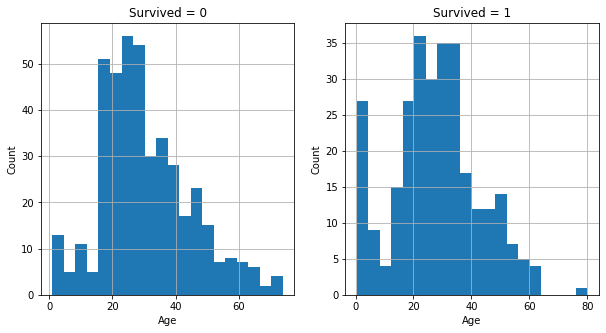

In [49]:
n_bins = 20
plt.figure(figsize=[10,5])
age_both = [age_no_surv, age_surv]
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.hist(age_both[i], bins=n_bins)
  plt.title("Survived = " + str(i)); plt.xlabel("Age"); plt.ylabel("Count"); plt.grid()
plt.show()

In [72]:
a = train_df_q11[train_df_q11['Age'] >= 15]
b = a[a['Age'] <= 25]

In [73]:
len(a)

636

In [74]:
len(b)

223

In [75]:
b['Survived'].mean()

0.3542600896860987

In [62]:
train_df_q11[train_df_q11['Age'] == 80]

,Age,Survived
630,80.0,1
